# Lab 12: Markov Chain Monte Carlo algorithm

$(x_{1},\ldots,x_{n})$ is a random sample generated from the
exponential distribution with rate $\lambda$. The prior of $\lambda$
is the exponential distribution with mean 1/2. The posterior
distribution of $\lambda$ given $(x_{1},\ldots,x_{n})$ is

$$f\left( \lambda \middle| X \right) = \frac{f(X|\lambda)f(\lambda)}{f(X)} = \frac{\lambda^{n}e^{- \lambda\sum_{i = 1}^{n}x_{i}}*2e^{- 2\lambda}}{f(X)} = \frac{2\lambda^{n}e^{- \left( \sum_{i = 1}^{n}x_{i} + 2 \right)\lambda}}{f(X)}$$

This is a gamma distribution with $\alpha = n + 1$ and
$\beta = \sum_{i = 1}^{n}x_{i} + 2$. The posterior mean is
$\frac{\alpha}{\beta} = \frac{n + 1}{\sum_{i = 1}^{n}x_{i} + 2}$. Thus,
the Bayesian estimate of $\lambda$ is
$\frac{n + 1}{\sum_{i = 1}^{n}x_{i} + 2}$.

Suppose the data is (1.001, 0.065, 0.014, 1.601, 0.288, 0.095, 0.401,
0.227, 0.234, 0.488). Then, the Bayesian estimate of $\lambda$ is

$$\frac{n + 1}{\sum_{i = 1}^{n}x_{i} + 2} = \frac{10 + 1}{4.41 + 2} = 1.716$$

Here, we use the MCMC algorithm to approximate the posterior distribution
$f\left( \lambda \middle| X \right)$, then calculate the posterior mean.

The R code of the MCMC algorithm should have the following functions (1)
Likelihood function, (2) Prior, (3) a function for updating $\lambda$,
and (4) a function for accepting or rejecting the proposed
$\lambda_{new}$.

[1] "MCMC estimate of lambda: 0.992350136663558"


[1] "Bayesian estimate of lambda: 1.00317697927174"


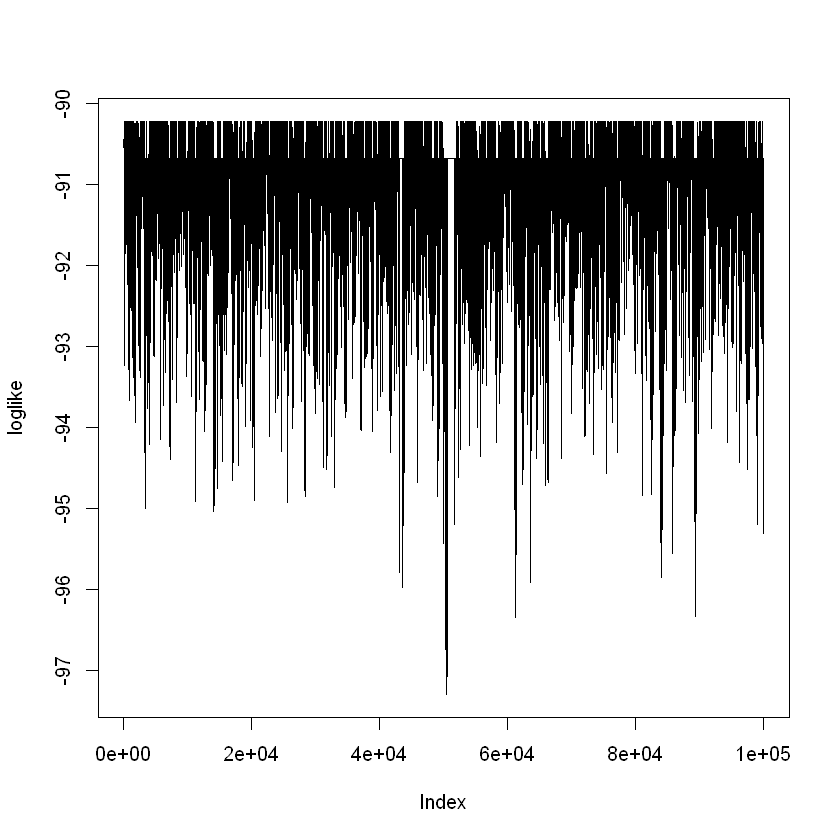

In [1]:
########################################################
# mcmc algorithm: likelihood: exp, prior: exp
########################################################
loglikelihood <- function (x, lambda) {
  n <- length(x)
  loglike <- n*log(lambda) - sum(x) * lambda
  return (loglike)
}
logprior <- function(lambda, theta) {
  logprior <- log(theta) - lambda*theta
  return (logprior)
}
update_lambda<-function(lambda, window_width){
  newlambda <- lambda + (2*runif(1)-1) * window_width
  return (newlambda)
}

#######################################################
# algorithm
########################################################
x = rexp(100)
samplesize = length(x)
theta <- 10 #prior of lambda
lambda_theory = (samplesize+1)/(sum(x)+theta)

totalround <- 100000
lambda <- 1:totalround
loglike <- 1:totalround
window_width <- 0.05

oldlambda <- 1 #initial value of lambda
oldloglike <- loglikelihood(x, oldlambda)
oldlogprior <- logprior(oldlambda, theta)

for (i in 1:totalround)
{
  newlambda <- update_lambda(oldlambda, window_width)
  if (newlambda<0) newlambda = -newlambda
  newloglike <- loglikelihood(x, newlambda)
  newlogprior <- logprior(newlambda, theta)

  hastings_ratio <- min(exp((newloglike+newlogprior)-(oldloglike+oldlogprior)),1)

  if(runif(1) < hastings_ratio){
    lambda[i] = newlambda
    loglike[i] = newloglike
    oldlambda = newlambda
    oldlogprior = newlogprior
  }else{
    lambda[i] = oldlambda
    loglike[i] = oldloglike
  }
}

plot(loglike,type="l")
burnin = totalround/2

print(paste("MCMC estimate of lambda:", mean(lambda[burnin:totalround])))
print(paste("Bayesian estimate of lambda:",lambda_theory))


## Bayesian phylogenetic inference
Preparation: Download MrBayes at http://nbisweden.github.io/MrBayes/download.html
Then, unzip the downloaded file MrBayes-3.2.7a.zip and navigate into the unzipped folder by typing cd ./MrBayes-3.2.7a in the terminal window.

To install MrBayes on your laptop, type **./configure** and then type make. The executable **mb** is located in the src folder. To run MrBayes interactively, type ./mb. Alternatively, you may run MrBayes using a batch file.

The data file finch.nex is available in the example folder. We will run MrBayes on this data set. We first add a MrBayes block in the data file and then run MrBayes by the command line 

```{code}
../src/mb -i finch.nex
```